<a href="https://colab.research.google.com/github/snehanshastri/ML/blob/main/Lab2_1BM22CS283.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/weatherdata.csv')
df.head()

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [13]:
final_df=df.drop(['Day'],axis=1)
final_df.head()

,Outlook,Temp,Humidity,Wind,Decision
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [14]:
y=df.Decision
y

,Decision
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1



Entropy of Decision: 0.940

Feature-wise Entropy and Information Gain:
Outlook - Entropy: 0.940, Information Gain: 0.247
Temp - Entropy: 0.940, Information Gain: 0.029
Humidity - Entropy: 0.940, Information Gain: 0.152
Wind - Entropy: 0.940, Information Gain: 0.048

Decision Tree:
{'Outlook': {2: {'Humidity': {0: 0, 1: 1}}, 0: 1, 1: {'Wind': {1: 1, 0: 0}}}}


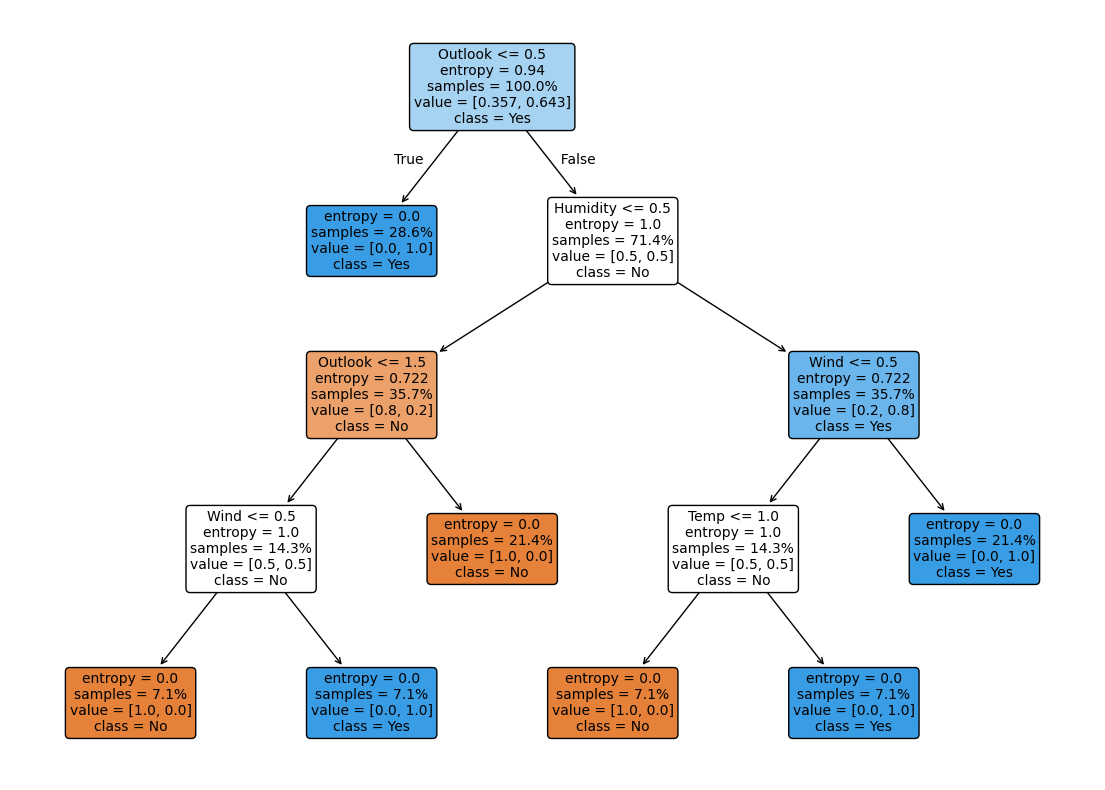

In [18]:
# Encode categorical features into numeric values for DecisionTreeClassifier
encoder = LabelEncoder()
for col in final_df.columns:
    final_df[col] = encoder.fit_transform(df[col])

# Function to calculate entropy
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy

# Function to calculate information gain
def calculate_information_gain(data, feature, target_column):
    total_entropy = calculate_entropy(data, target_column)

    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Function to implement the ID3 algorithm
def id3(data, target_column, features):
    # If all target values are the same, return that value
    if len(data[target_column].unique()) == 1:
        return data[target_column].iloc[0]

    # If no features left, return the most common target value
    if len(features) == 0:
        return data[target_column].mode().iloc[0]

    # Find the best feature based on information gain
    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

    # Create a new tree node
    tree = {best_feature: {}}

    # Remove the best feature from the list of available features
    remaining_features = [f for f in features if f != best_feature]

    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        if len(subset) == 0:
            tree[best_feature][value] = data[target_column].mode().iloc[0]
        else:
            tree[best_feature][value] = id3(subset, target_column, remaining_features)

    return tree

# Display entropy of target column
entropy = calculate_entropy(final_df, 'Decision')
print(f"\nEntropy of Decision: {entropy:.3f}\n")

# Display information gain for each feature
print("Feature-wise Entropy and Information Gain:")
for feature in final_df.columns[:-1]:
    entropy = calculate_entropy(final_df, 'Decision')
    info_gain = calculate_information_gain(final_    df, feature, 'Decision')
    print(f"{feature} - Entropy: {entropy:.3f}, Information Gain: {info_gain:.3f}")

# Build decision tree using ID3
features = list(final_df.columns[:-1])  # All columns except the target
target_column = 'Decision'

decision_tree = id3(final_df, target_column, features)
print("\nDecision Tree:")
print(decision_tree)

# --- Train and plot using DecisionTreeClassifier for visualization ---
clf = DecisionTreeClassifier(criterion='entropy')

# Prepare data for the classifier
X = final_df[features]
y = final_df[target_column]
clf.fit(X, y)

# Plot the complete decision tree
plt.figure(figsize=(14, 10))
plot_tree(clf, feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10, proportion=True)
plt.show()